In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import re


In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
sentences = ["I ate dinner.",
       "We had a three-course meal.",
       "Brad came to dinner with us.",
       "He loves fish tacos.",
       "In the end, we all felt like we ate too much.",
       "We all agreed; it was a magnificent evening."]

## Bag of Words
represents a document as an unordered set of words and their respective frequencies.

In [ ]:
def BagOfWords(Corpus):

    # Returns the entire bag of words
    BoW = np.array([])
    for i in Corpus.index:

        text = Corpus.loc[i]

        # Identify words in text
        text = text.split()

        # Concatenate with previously identified texts
        BoW = np.concatenate((BoW, np.array(text)), axis = None)
        BoW = np.unique(BoW)

    return BoW


In [ ]:
def TransformBoW(df, BoW):

    dfBoW = df.copy()

    # Transform dataframe into BoW
    for word in BoW:
        dfBoW[word] = df["Comments"].str.count(word)

    # Move y variable to the left
    sentiment = dfBoW["Sentiment"]
    del dfBoW["Sentiment"], dfBoW["Comments"]
    dfBoW["Sentiment"] = sentiment

    return dfBoW

In [ ]:
BoW = BagOfWords(df["Comments"])
dfBoW = TransformBoW(df, BoW)
dfBoW.to_csv("BoW.csv", index = False)
dfBoW

,although,amazed,bad,beautiful,bob,caution,clear,concept,definitely,difficult,...,taking,taught,terrible,though,time,trying,understand,warned,way,Sentiment
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Negative
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Positive
3,0,0,0,0,0,1,0,0,0,1,...,1,1,0,0,0,0,0,0,0,Negative
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,1,0,0,Negative
5,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,Positive
6,0,0,2,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,Negative
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,Positive
8,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Negative


## One Hot Encoding
Each word in the vocab is represented with a unique vector. The vector has all elements set to 0, except for the element corresponding to the index of the word in the vocabulary, which is set to 1.

In [ ]:
def TransformOHE(df, BoW):

    dfOHE = df.copy()

    # Transform dataframe into BoW
    for word in BoW:
        dfOHE[word] = np.where(df["Comments"].str.contains(word), 1, 0)
    # Move y variable to the left
    sentiment = dfOHE["Sentiment"]

    del dfOHE["Sentiment"], dfOHE["Comments"]
    dfOHE["Sentiment"] = sentiment


    return dfOHE

In [ ]:
BoW = BagOfWords(df["Comments"])
dfOHE = TransformOHE(df, BoW)
dfOHE.to_csv("OHE.csv", index = False)
dfOHE

,although,amazed,bad,beautiful,bob,caution,clear,concept,definitely,difficult,...,taking,taught,terrible,though,time,trying,understand,warned,way,Sentiment
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Negative
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Positive
3,0,0,0,0,0,1,0,0,0,1,...,1,1,0,0,0,0,0,0,0,Negative
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,1,0,0,Negative
5,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,Positive
6,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,Negative
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,Positive
8,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Negative


## Task:
Classify a given comment into positive or negative using BOW and OHE

In [ ]:
df = pd.read_csv("Train.csv")

In [ ]:
df=df.drop(['Text_ID','Product_Type'], axis=1)

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import pandas as pd

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  # Specifically ask for the missing resource
nltk.download('wordnet')
nltk.download('stopwords')


# Preprocessing setup
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Dummy DataFrame example
# df = pd.DataFrame({'Product_Description': ['This is a test description!', 'Another item here.']})
df['Product_Description'] = df['Product_Description'].astype(str).fillna("")

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    tokens = word_tokenize(text)
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(processed_tokens)

df['Product_Description_processed'] = df['Product_Description'].apply(preprocess_text)

print(df[['Product_Description', 'Product_Description_processed']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                 Product_Description  \
0  The Web DesignerÛªs Guide to iOS (and Android...   
1  RT @mention Line for iPad 2 is longer today th...   
2  Crazy that Apple is opening a temporary store ...   
3  The lesson from Google One Pass: In this digit...   
4  RT @mention At the panel: &quot;Your mom has a...   

                       Product_Description_processed  
0  web designer guide io android apps today menti...  
1  rt mention line ipad 2 longer today yesterday ...  
2  crazy apple opening temporary store austin tom...  
3  lesson google one pas digital environment user...  
4  rt mention panel quotyour mom ipad designing b...  


In [ ]:
df=df.drop('Product_Description',axis=1)

In [ ]:

from nltk import ngrams

df['Product_Description_3grams'] = df['Product_Description_processed'].apply(lambda x: list(ngrams(x.split(), 3)))

print(df[['Product_Description_processed', 'Product_Description_3grams']].head())

                       Product_Description_processed  \
0  web designer guide io android apps today menti...   
1  rt mention line ipad 2 longer today yesterday ...   
2  crazy apple opening temporary store austin tom...   
3  lesson google one pas digital environment user...   
4  rt mention panel quotyour mom ipad designing b...   

                          Product_Description_3grams  
0  [(web, designer, guide), (designer, guide, io)...  
1  [(rt, mention, line), (mention, line, ipad), (...  
2  [(crazy, apple, opening), (apple, opening, tem...  
3  [(lesson, google, one), (google, one, pas), (o...  
4  [(rt, mention, panel), (mention, panel, quotyo...  


In [ ]:
from collections import defaultdict

# Function to count occurrences of phrases
def count_phrases(df, column_name):
    phrase_counts = defaultdict(int)
    for phrases in df[column_name]:
        for phrase in phrases:
            phrase_counts[phrase] += 1
    return phrase_counts

# Count 3-gram phrases
phrase_counts_3grams = count_phrases(df, 'Product_Description_3grams')

# Display the most common 3-gram phrases
print("\nMost common 3-gram phrases:")
for phrase, count in sorted(phrase_counts_3grams.items(), key=lambda item: item[1], reverse=True)[:10]:
    print(f"{' '.join(phrase)}: {count}")



Most common 3-gram phrases:
new social network: 275
social network called: 232
network called circle: 217
rt mention google: 209
major new social: 204
launch major new: 199
link via mention: 181
google launch major: 181
mention rt mention: 170
called circle possibly: 166


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Assuming df is the DataFrame loaded previously with 'Sentiment' and 'Product_Description_processed'

# Split data into training and testing sets
X = df['Product_Description_processed']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Using Bag of Words (BOW) for Classification ---

# Initialize CountVectorizer (for BOW)
vectorizer_bow = CountVectorizer()

# Fit and transform training data, transform testing data
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

# Initialize and train a classifier (e.g., Logistic Regression)
model_bow = LogisticRegression(max_iter=1000) # Increase max_iter for convergence
model_bow.fit(X_train_bow, y_train)

# Make predictions
y_pred_bow = model_bow.predict(X_test_bow)

# Evaluate the model
print("--- Bag of Words Classification Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_bow))
print("Classification Report:\n", classification_report(y_test, y_pred_bow))

vectorizer_ohe = CountVectorizer(binary=True) # binary=True makes it treat counts > 0 as 1

# Fit and transform training data, transform testing data
X_train_ohe = vectorizer_ohe.fit_transform(X_train)
X_test_ohe = vectorizer_ohe.transform(X_test)

# Initialize and train a classifier
model_ohe = LogisticRegression(max_iter=1000)
model_ohe.fit(X_train_ohe, y_train)

# Make predictions
y_pred_ohe = model_ohe.predict(X_test_ohe)

# Evaluate the model
print("\n--- One-Hot Encoding (using CountVectorizer binary=True) Classification Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_ohe))
print("Classification Report:\n", classification_report(y_test, y_pred_ohe))

--- Bag of Words Classification Results ---
Accuracy: 0.6708562450903378
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.04      0.06        27
           1       0.51      0.25      0.34        80
           2       0.71      0.82      0.76       772
           3       0.58      0.51      0.54       394

    accuracy                           0.67      1273
   macro avg       0.51      0.40      0.43      1273
weighted avg       0.65      0.67      0.65      1273


--- One-Hot Encoding (using CountVectorizer binary=True) Classification Results ---
Accuracy: 0.6732128829536528
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.04      0.06        27
           1       0.44      0.23      0.30        80
           2       0.72      0.82      0.76       772
           3       0.60      0.53      0.56       394

    accuracy                           0.67      1273
   m

## Cosine Similarity

In [ ]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

## Word2vec
a neural approach for generating word embeddings. Word2Vec aims to capture the semantic relationships between words by mapping them to high-dimensional vectors.


In [ ]:
!pip install gensim
from gensim.models import Word2Vec

In [ ]:

tokenized_corpus = [word_tokenize(row.lower()) for row in sentences] # Lowercasing for consistency

skipgram_model = Word2Vec(sentences=tokenized_corpus,
						vector_size=100, # Dimensionality of the word vectors
						window=5,		 # Maximum distance between the current and predicted word within a sentence
						sg=1,			 # Skip-Gram model (1 for Skip-Gram, 0 for CBOW)
						min_count=1,	 # Ignores all words with a total frequency lower than this
						workers=4)	 # Number of CPU cores to use for training the model



In [ ]:
# Training
skipgram_model.train(tokenized_corpus, total_examples=1, epochs=10)
skipgram_model.save("skipgram_model.model")

In [ ]:

loaded_model = Word2Vec.load("skipgram_model.model")
vector_representation = loaded_model.wv['meal']
print("Vector representation of 'word':", vector_representation)


Vector representation of 'word': [-0.00950447  0.00955515 -0.0077696  -0.00262882 -0.00491648 -0.00496634
 -0.00800592 -0.0077716  -0.00456628 -0.00127767 -0.00510698  0.00611917
 -0.00950381 -0.00529229  0.00942755  0.00696844  0.00769432  0.00421969
  0.00050556 -0.00601709  0.0060352   0.00262788  0.00770882  0.00641462
  0.00793716  0.00866055 -0.00990894 -0.00674955  0.00132602  0.00642591
  0.00740164  0.00551738  0.00766585 -0.0051569   0.00659095 -0.00411945
 -0.00902732  0.00914723  0.00132314 -0.00275034 -0.00248252 -0.00424674
  0.0048073   0.00440467 -0.00265729 -0.00736784 -0.00358463 -0.00033224
  0.0061072  -0.00283444 -0.00011622  0.00087059 -0.00709479  0.00208692
 -0.00145339  0.00280635  0.00486646 -0.00136687 -0.00279726  0.00774455
  0.0050585   0.00669449  0.00454339  0.00867365  0.00745073 -0.00106798
  0.00872912  0.00460604  0.0054318  -0.00138315 -0.00203615 -0.00440521
 -0.00851143  0.00303608  0.00890537  0.00892032 -0.00194119  0.00611661
  0.00377736 -0.00

In [ ]:
sims = loaded_model.wv.most_similar('meal', topn=10)  # get other similar words
print(sims)

[('a', 0.25521278381347656), ('like', 0.15167315304279327), (',', 0.1484365612268448), ('magnificent', 0.14477501809597015), ('we', 0.14049503207206726), ('fish', 0.11698395758867264), ('the', 0.07397393882274628), ('it', 0.06812236458063126), ('all', 0.04888879880309105), ('end', 0.04875940829515457)]


# Word2vec on a real dataset

In [ ]:
!unzip simpsons_dataset.csv.zip #The dataset is the Simpsons' lines of dialogue

Archive:  simpsons_dataset.csv.zip
  inflating: simpsons_dataset.csv    


Embeddings with multiword ngrams


In [ ]:
import re  # For preprocessing
import pandas as pd  # For data handling
import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [ ]:
df = pd.read_csv('simpsons_dataset.csv')
df.head()

,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...


Lets clean and balance the data

In [ ]:
df.isnull().sum() #returns a df object where all the values are replaced with a Boolean value True for NULL values, and otherwise False and sums those values

raw_character_text    17814
spoken_words          26459
dtype: int64

In [ ]:
df = df.dropna().reset_index(drop=True) #Removes the missing value
df.isnull().sum()

raw_character_text    0
spoken_words          0
dtype: int64

In [ ]:
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

In [ ]:
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df['spoken_words']) #removing any non-alphabetic characters incase any encoding error happened


In [ ]:
t = time.time()

txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000)] #creating a pipeline to process the data


print('Time to clean up everything', time.strftime("%H:%M:%S", time.gmtime(time.time()-t)))

Time to clean up everything 00:02:09


In [ ]:
df_clean = pd.DataFrame({'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

(85955, 1)

Gensim Phrases package to automatically detect common phrases (bigrams) from a list of sentences

In [ ]:
from gensim.models.phrases import Phrases, Phraser
sent = [row.split() for row in df_clean['clean']]


Why do we need Phrases and Phraser? The goal of Phraser() is to cut down memory consumption of Phrases(), by discarding model state not strictly needed for the bigram detection task

In [ ]:
phrases = Phrases(sent, min_count=30, progress_per=10000)
 #takes a list of list of words as input

In [ ]:
bigram = Phraser(phrases)
sentences_ = bigram[sent]
word_freq = defaultdict(int)
for sent in sentences_:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

29694

In [ ]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]


['oh', 'like', 'know', 'get', 'hey', 'think', 'come', 'right', 'look', 'want']

In [ ]:
import multiprocessing



In [ ]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer


In [ ]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=300,
                     sample=6e-5,
                     alpha=0.03,
                     min_alpha=0.0007,
                     negative=20,
                     workers=cores-1)

In [ ]:
t = time.time()

w2v_model.build_vocab(sentences_, progress_per=10000) # Can only be done once!!

print('Time to build the vocab', time.strftime("%H:%M:%S", time.gmtime(time.time()-t)))

Time to build the vocab 00:00:01


In [ ]:
sentences_

In [ ]:
t = time.time()

w2v_model.train(sentences_, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model', time.strftime("%H:%M:%S", time.gmtime(time.time()-t)))

Time to train the model 00:01:09


In [ ]:
# w2v_model.init_sims(replace=True) #no further training so init_sims() makes the model much more memory-efficient:

<ipython-input-49-f46c6c62f4fa>:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True) #no further training so init_sims() makes the model much more memory-efficient:


In [ ]:
w2v_model.wv.most_similar(positive=["homer"])

[('sweetheart', 0.7089717984199524),
 ('marge', 0.6976544857025146),
 ('humiliate', 0.6959439516067505),
 ('depressed', 0.6958469152450562),
 ('gee', 0.6857178211212158),
 ('snuggle', 0.6756035089492798),
 ('hammock', 0.6676444411277771),
 ('embarrassing', 0.6632099151611328),
 ('badly', 0.6603363752365112),
 ('terrific', 0.660012423992157)]

In [ ]:
w2v_model.wv.most_similar(positive=["marge"])

[('humiliate', 0.7133126258850098),
 ('becky', 0.7076418399810791),
 ('homer', 0.6976544857025146),
 ('sorry', 0.6886954307556152),
 ('ralphie', 0.6843724846839905),
 ('snuggle', 0.6792821884155273),
 ('attract', 0.6763634085655212),
 ('embarrassing', 0.6742489337921143),
 ('hopeless', 0.6735115647315979),
 ('badly', 0.6731808185577393)]

In [ ]:
w2v_model.wv.similarity("marge", 'homer')


0.6976545

In [ ]:
w2v_model.wv.similarity('hate', 'love')

0.5159856

How is it done?
we take the mean of all the word-vectors, and sort of 'center' for all candidates. Then calculate the cosine-distance from that center to each word.This is the dot-product between unit-normalized versions of each relevant vector
return the single word with the highest cosine-distance from that mean

In [ ]:
w2v_model.wv.doesnt_match(['day', 'night', 'evening'])


'day'

##GloVe


In [ ]:
from gensim.models import KeyedVectors
from gensim.downloader import load

glove_model = load('glove-wiki-gigaword-50')
word_pairs = [('learn', 'learning'), ('india', 'indian'), ('fame', 'famous')]

# Compute similarity for each pair of words
for pair in word_pairs:
	similarity = glove_model.similarity(pair[0], pair[1])
	print(f"Similarity between '{pair[0]}' and '{pair[1]}' using GloVe: {similarity:.3f}")


[==================================================] 100.0% 66.0/66.0MB downloaded
Similarity between 'learn' and 'learning' using GloVe: 0.802
Similarity between 'india' and 'indian' using GloVe: 0.865
Similarity between 'fame' and 'famous' using GloVe: 0.589


# Beyond Word Embedding
Sentence Embedding

## Doc2Vec

unsupervised algorithm and adds on to the Word2Vec

In [ ]:
sentences

['I ate dinner.',
 'We had a three-course meal.',
 'Brad came to dinner with us.',
 'He loves fish tacos.',
 'In the end, we all felt like we ate too much.',
 'We all agreed; it was a magnificent evening.']

In [ ]:
# Tokenization of each document
tokenized_sent = []
for s in sentences:
  # print(s)
  tokenized_sent.append(word_tokenize(s.lower()))
print(tokenized_sent)

[['i', 'ate', 'dinner', '.'], ['we', 'had', 'a', 'three-course', 'meal', '.'], ['brad', 'came', 'to', 'dinner', 'with', 'us', '.'], ['he', 'loves', 'fish', 'tacos', '.'], ['in', 'the', 'end', ',', 'we', 'all', 'felt', 'like', 'we', 'ate', 'too', 'much', '.'], ['we', 'all', 'agreed', ';', 'it', 'was', 'a', 'magnificent', 'evening', '.']]


In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
'''
The TaggedDocuments are used as input for Doc2Vec.
Their tags can be either string tokens or int
TaggedDocument containing a list of the words in it along with the associated tag
'''
tagged_data = [TaggedDocument(d, ["id_"+str(i)]) for i, d in enumerate(tokenized_sent)]
tagged_data

[TaggedDocument(words=['i', 'ate', 'dinner', '.'], tags=['id_0']),
 TaggedDocument(words=['we', 'had', 'a', 'three-course', 'meal', '.'], tags=['id_1']),
 TaggedDocument(words=['brad', 'came', 'to', 'dinner', 'with', 'us', '.'], tags=['id_2']),
 TaggedDocument(words=['he', 'loves', 'fish', 'tacos', '.'], tags=['id_3']),
 TaggedDocument(words=['in', 'the', 'end', ',', 'we', 'all', 'felt', 'like', 'we', 'ate', 'too', 'much', '.'], tags=['id_4']),
 TaggedDocument(words=['we', 'all', 'agreed', ';', 'it', 'was', 'a', 'magnificent', 'evening', '.'], tags=['id_5'])]

In [ ]:
model = Doc2Vec(tagged_data, vector_size = 20, window = 2, min_count = 1, epochs = 100)

'''
vector_size = Dimensionality of the feature vectors.
window = The maximum distance between the current and predicted word within a sentence.
min_count = Ignores all words with total frequency lower than this.
alpha = The initial learning rate.
'''

## Print model vocabulary
print(model.wv.key_to_index)

{'.': 0, 'we': 1, 'ate': 2, 'dinner': 3, 'a': 4, 'all': 5, 'evening': 6, 'came': 7, 'us': 8, 'with': 9, 'to': 10, 'three-course': 11, 'brad': 12, 'meal': 13, 'loves': 14, 'had': 15, 'he': 16, 'fish': 17, 'magnificent': 18, 'tacos': 19, 'in': 20, 'the': 21, 'end': 22, ',': 23, 'felt': 24, 'like': 25, 'too': 26, 'much': 27, 'agreed': 28, ';': 29, 'it': 30, 'was': 31, 'i': 32}


In [ ]:
query="I had pizza and pasta"
query_vec= word_tokenize(query.lower())

In [ ]:
query_vec

['i', 'had', 'pizza', 'and', 'pasta']

In [ ]:
test_doc_vector = model.infer_vector(query_vec) # infer_vector method returns the vectorized form (including the paragraph vector)
model.dv.most_similar(positive = [test_doc_vector])

'''
positive = List of sentences that contribute positively.
'''

<ipython-input-62-8ada808836b3>:2: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model.docvecs.most_similar(positive = [test_doc_vector])


'\npositive = List of sentences that contribute positively.\n'

In [ ]:
test_doc_vector

array([ 0.01932388,  0.02065368,  0.01091801,  0.00111557,  0.03352908,
       -0.0229921 ,  0.01285814,  0.02196711,  0.00371635, -0.03580254,
       -0.01865276,  0.02062623, -0.05120435, -0.03189794, -0.02230723,
        0.00413363,  0.00622759, -0.01198937,  0.01396133, -0.0004412 ],
      dtype=float32)

In [ ]:
model.docvecs.most_similar(positive = [test_doc_vector])

<ipython-input-64-ae7ccd1e3b38>:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model.docvecs.most_similar(positive = [test_doc_vector])


[('id_3', 0.8300685286521912),
 ('id_4', 0.7374358177185059),
 ('id_2', 0.5306283831596375),
 ('id_1', 0.4915909767150879),
 ('id_5', 0.25931960344314575),
 ('id_0', 0.016950489953160286)]

In [ ]:
for sent in sentences:
  sim = cosine(model.infer_vector(query_vec), model.infer_vector(word_tokenize(sent.lower())))
  print("Sentence = ", sent, "; similarity = ", sim)

Sentence =  I ate dinner. ; similarity =  0.6546766
Sentence =  We had a three-course meal. ; similarity =  0.73579836
Sentence =  Brad came to dinner with us. ; similarity =  0.7746182
Sentence =  He loves fish tacos. ; similarity =  0.59783506
Sentence =  In the end, we all felt like we ate too much. ; similarity =  0.73284674
Sentence =  We all agreed; it was a magnificent evening. ; similarity =  0.75873125


## SentenceBERT

SentenceBERT was introduced in 2018, it is BERT-based network that uses a Siamese network like architecture.

In [ ]:
!pip install sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.5/149.5 kB 3.6 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
sentence_embeddings = sbert_model.encode(sentences)



In [ ]:
# print('Sample BERT embedding vector - length', len(sentence_embeddings[0]))
# print('Sample BERT embedding vector - note includes negative values', sentence_embeddings[0])

In [ ]:
query = "I had pizza and pasta"
query_vec = sbert_model.encode([query])[0]

In [ ]:
for sent in sentences:
  sim = cosine(query_vec, sbert_model.encode([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

Sentence =  I ate dinner. ; similarity =  0.7173461
Sentence =  We had a three-course meal. ; similarity =  0.6371338
Sentence =  Brad came to dinner with us. ; similarity =  0.5897908
Sentence =  He loves fish tacos. ; similarity =  0.6223936
Sentence =  In the end, we all felt like we ate too much. ; similarity =  0.41980496
Sentence =  We all agreed; it was a magnificent evening. ; similarity =  0.18081604


## Universal Sentence Encoder


It was proposed by Google. The key feature here is that we can use it for Multi-task learning.

How does it work?

1.   Tokenize the sentences after converting them to lowercase
2.   Depending on the type of encoder, the sentence gets converted to a 512-dimensional vector
  1.  If we use the transformer, it is similar to the encoder module of the transformer architecture and uses the self-attention mechanism.
  2.  The Deep Averaging Network (DAN) option computes the unigram and bigram embeddings first and then averages them to get a single embedding. This is then passed to a deep neural network to get a final sentence embedding of 512 dimensions.
3.  These sentence embeddings are then used for various unsupervised and supervised tasks. The trained model is then again reused to generate a new 512 dimension sentence embedding.

In [ ]:
!pip3 install --upgrade tensorflow-gpu
# Install TF-Hub.
!pip3 install tensorflow-hub

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
sentence_embeddings = model(sentences)
query = "I had pizza and pasta"
query_vec = model([query])[0]

In [ ]:
for sent in sentences:
  sim = cosine(query_vec, model([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

Sentence =  I ate dinner. ; similarity =  0.46866417
Sentence =  We had a three-course meal. ; similarity =  0.35643065
Sentence =  Brad came to dinner with us. ; similarity =  0.20338944
Sentence =  He loves fish tacos. ; similarity =  0.16515437
Sentence =  In the end, we all felt like we ate too much. ; similarity =  0.14987424
Sentence =  We all agreed; it was a magnificent evening. ; similarity =  0.058435917


## InferSent

 Introduced by Facebook AI Research in 2018, InferSent is a supervised sentence embedding technique

In [ ]:
!git clone https://github.com/facebookresearch/InferSent.git

Cloning into 'InferSent'...
remote: Enumerating objects: 259, done.
remote: Total 259 (delta 0), reused 0 (delta 0), pack-reused 259
Receiving objects: 100% (259/259), 424.15 KiB | 3.63 MiB/s, done.
Resolving deltas: 100% (135/135), done.


In [ ]:
%cd InferSent

/content/InferSent


In [ ]:
!mkdir encoder
!curl -Lo encoder/infersent2.pkl https://dl.fbaipublicfiles.com/infersent/infersent2.pkl

!mkdir GloVe
!curl -Lo GloVe/glove.840B.300d.zip http://nlp.stanford.edu/data/glove.840B.300d.zip
!unzip GloVe/glove.840B.300d.zip -d GloVe/

In [ ]:
from models import InferSent
import torch

V = 2
MODEL_PATH = './encoder/infersent%s.pkl' % V
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': V}
model = InferSent(params_model)
model.load_state_dict(torch.load(MODEL_PATH))

W2V_PATH = './GloVe/glove.840B.300d.txt' #save the trained model and pre-trained GLoVe word vectors
model.set_w2v_path(W2V_PATH)

In [ ]:
model.build_vocab(sentences, tokenize=True)


FileNotFoundError: [Errno 2] No such file or directory: './GloVe/glove.840B.300d.txt'

In [ ]:
query = "I had pizza and pasta"
query_vec = model.encode(query)[0]
query_vec

In [ ]:
similarity = []
for sent in sentences:
  sim = cosine(query_vec, model.encode([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

# Task

Use a Sentence Embedding model to embedd the dialogues and their speakers to build a classification model.

**input:** sentence

**output:** the most likely speaker for that input

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from collections import defaultdict



In [ ]:
df=pd.read_csv("TMDB_tv_dataset_v3.csv")
df.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,Winter Is Coming,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,The perfect robbery.,"Crime, Drama",Álex Pina,es,"Netflix, Antena 3",ES,Español,Vancouver Media,Spain,70
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,Every ending has a beginning.,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,Fight the dead. Fear the living.,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,It's good to be bad.,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168639 entries, 0 to 168638
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    168639 non-null  int64  
 1   name                  168634 non-null  object 
 2   number_of_seasons     168639 non-null  int64  
 3   number_of_episodes    168639 non-null  int64  
 4   original_language     168639 non-null  object 
 5   vote_count            168639 non-null  int64  
 6   vote_average          168639 non-null  float64
 7   overview              93333 non-null   object 
 8   adult                 168639 non-null  bool   
 9   backdrop_path         77780 non-null   object 
 10  first_air_date        136903 non-null  object 
 11  last_air_date         138735 non-null  object 
 12  homepage              50998 non-null   object 
 13  in_production         168639 non-null  bool   
 14  original_name         168634 non-null  object 
 15  

In [ ]:
df['type'].value_counts()

,count
type,
Scripted,129301
Documentary,13864
Miniseries,10810
Reality,9682
Talk Show,2997
Video,1379
News,606


Aiming to predict type based on overview

In [ ]:
df=df[['overview','type']]
df.head()

,overview,type
0,Seven noble families fight for control of the ...,Scripted
1,"To carry out the biggest heist in history, a m...",Scripted
2,"When a young boy vanishes, a small town uncove...",Scripted
3,Sheriff's deputy Rick Grimes awakens from a co...,Scripted
4,"Bored and unhappy as the Lord of Hell, Lucifer...",Scripted


In [ ]:
df.isnull().dropna()

,overview,type
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
168634,True,False
168635,True,False
168636,False,False
168637,False,False


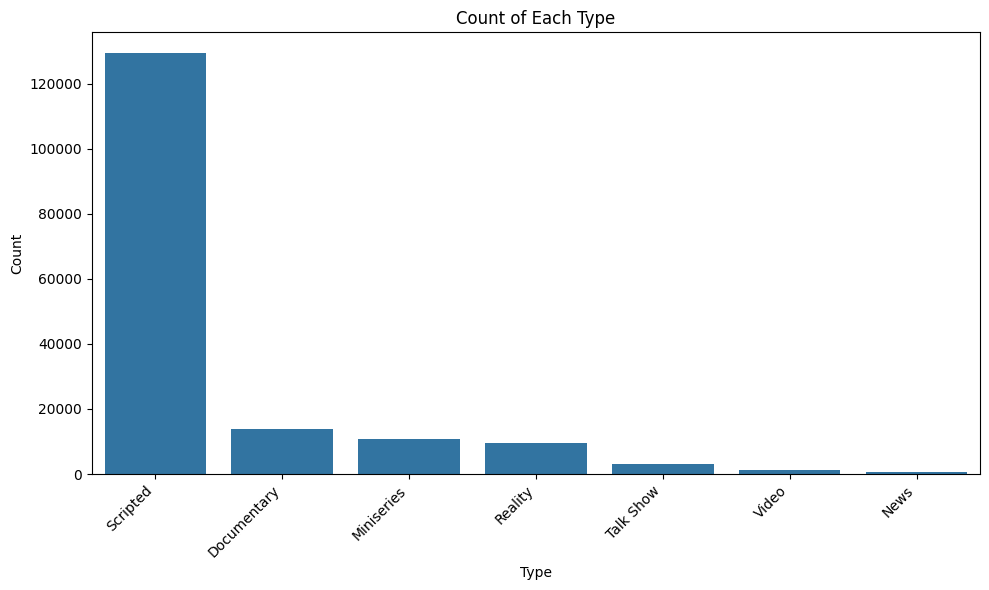

In [ ]:

# Count the occurrences of each 'type'
type_counts = df['type'].value_counts().reset_index()
type_counts.columns = ['type', 'count']

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='count', data=type_counts)
plt.title('Count of Each Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng') # ✅ Download the specific English tagger
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    if pd.isnull(text):
        return []
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    phrases = ["new york", "star wars", "game of thrones"]
    for phrase in phrases:
        text = text.replace(phrase, phrase.replace(" ", "_"))
    text = re.sub(r'[^a-z_\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tagged_tokens = pos_tag(tokens)
    lemmatized = [
        lemmatizer.lemmatize(word, get_wordnet_pos(pos_tag))
        for word, pos_tag in tagged_tokens
    ]
    return lemmatized

df['clean_tokens'] = df['overview'].apply(clean_text)
df = df[df['clean_tokens'].map(len) > 0].reset_index(drop=True)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<ipython-input-11-4e0c0bc77901>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(tokens), palette='viridis')


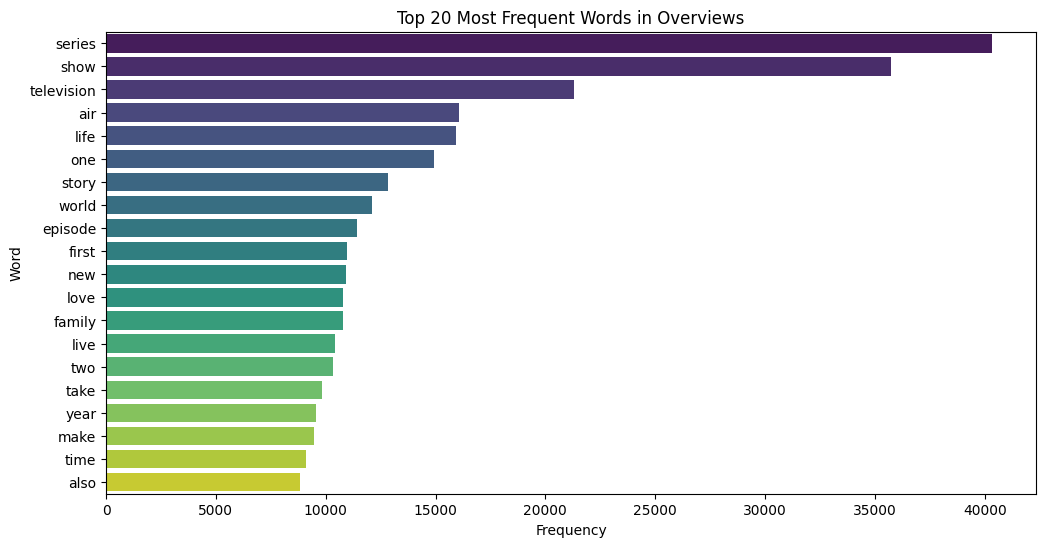

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten token lists and count
all_tokens = [token for tokens in df['clean_tokens'] for token in tokens]
token_counts = Counter(all_tokens)
common_tokens = token_counts.most_common(20)

# Plot
tokens, counts = zip(*common_tokens)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(tokens), palette='viridis')
plt.title("Top 20 Most Frequent Words in Overviews")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()


In [ ]:
df.drop('overview', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93253 entries, 0 to 93252
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          93253 non-null  object
 1   clean_tokens  93253 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [ ]:
from sklearn.model_selection import train_test_split

# Drop rows with missing text or labels
df = df.dropna(subset=['clean_tokens', 'type'])

# Step 1: Split into 80% train, 20% temp (for val/test)
train_df, temp_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df['type']
)

# Step 2: Split temp into 10% val and 10% test (half of temp each)
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    random_state=42,
    stratify=temp_df['type']
)


In [ ]:
!pip install --upgrade numpy
!pip install --upgrade --force-reinstall gensim

  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.m

In [ ]:
!pip install gensim
from gensim.models import Word2Vec

In [ ]:
import multiprocessing
cores = multiprocessing.cpu_count() # Count the number of cores in a computer

w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=300,
                     sample=6e-5,
                     alpha=0.03,
                     min_alpha=0.0007,
                     negative=20,
                     workers=cores-1)

In [ ]:
from gensim.models import Word2Vec
import numpy as np
import time

# Assuming train_df, val_df, test_df are ready and each has 'clean_tokens' as list of tokens

# Prepare training sentences for Word2Vec
train_sentences = train_df['clean_tokens'].tolist()  # list of token lists

# Initialize Word2Vec model with desired params
w2v_model = Word2Vec(
    vector_size=300,  # embedding size
    window=5,
    min_count=5,      # ignore rare words
    workers=4,        # number of CPU cores
    sample=6e-5,
    alpha=0.03,
    min_alpha=0.0007,
    negative=20
)

# Build vocabulary from training data
t0 = time.time()
w2v_model.build_vocab(train_sentences)
print(f"Vocab build time: {time.time() - t0:.2f} seconds")

# Train the Word2Vec model
t1 = time.time()
w2v_model.train(train_sentences, total_examples=w2v_model.corpus_count, epochs=30)
print(f"Training time: {time.time() - t1:.2f} seconds")

# Function to get averaged document vector
def document_vector(tokens, model):
    # filter tokens in vocab
    tokens = [t for t in tokens if t in model.wv.key_to_index]
    if len(tokens) == 0:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[tokens], axis=0)

# Create document vectors for each set
train_df['w2v_vector'] = train_df['clean_tokens'].apply(lambda x: document_vector(x, w2v_model))
val_df['w2v_vector'] = val_df['clean_tokens'].apply(lambda x: document_vector(x, w2v_model))
test_df['w2v_vector'] = test_df['clean_tokens'].apply(lambda x: document_vector(x, w2v_model))

# Example: check the shape of one vector
print("Example vector shape:", train_df['w2v_vector'].iloc[0].shape)


Vocab build time: 1.56 seconds
Training time: 395.78 seconds
Example vector shape: (300,)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Prepare data for SVM
X_train = np.array(train_df['w2v_vector'].tolist())
X_val = np.array(val_df['w2v_vector'].tolist())
X_test = np.array(test_df['w2v_vector'].tolist())

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(train_df['type'])
y_val_encoded = label_encoder.transform(val_df['type'])
y_test_encoded = label_encoder.transform(test_df['type'])

In [ ]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train_encoded)

# Predict on validation set
y_val_pred_encoded = svm_model.predict(X_val)
y_val_pred_proba = svm_model.predict_proba(X_val)

# Evaluate on validation set
print("Validation Set Performance:")
print(f"Accuracy: {accuracy_score(y_val_encoded, y_val_pred_encoded):.4f}")
print("Classification Report:")
print(classification_report(y_val_encoded, y_val_pred_encoded, target_names=label_encoder.classes_))

# Predict on test set
y_test_pred_encoded = svm_model.predict(X_test)
y_test_pred_proba = svm_model.predict_proba(X_test)

# Evaluate on test set
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_test_pred_encoded):.4f}")
print("Classification Report:")
print(classification_report(y_test_encoded, y_test_pred_encoded, target_names=label_encoder.classes_))


used straified splitting to mitigate target bias as shown in scripted type

# Additional Resources


[Text Encoding](https://towardsdatascience.com/a-guide-to-encoding-text-in-python-ef783e50f09e)

[Text Encoding 2](https://medium.com/geekculture/encoding-text-for-nlp-tasks-84696bce83e6)

[Word Embeddings101](https://www.geeksforgeeks.org/word-embeddings-in-nlp/)

[Data Representation](https://www.kdnuggets.com/2018/11/data-representation-natural-language-processing.html)


[Gensim Models](https://tedboy.github.io/nlps/generated/gensim.models.html)

[Machine Learning Techniques for Text Representation in NLP](https://www.analyticsvidhya.com/blog/2022/02/machine-learning-techniques-for-text-representation-in-nlp/)


[Extracting Medical Information From Clinical Text With NLP](https://www.analyticsvidhya.com/blog/2023/02/extracting-medical-information-from-clinical-text-with-nlp/)

[Supervised Learning of Universal Sentence Representations from Natural Language Inference Data](https://arxiv.org/abs/1705.02364)

[word2vec tutorial](https://www.kaggle.com/code/pierremegret/gensim-word2vec-tutorial/notebook)

[Building a Recommendation System using Word2vec](https://www.analyticsvidhya.com/blog/2019/07/how-to-build-recommendation-system-word2vec-python/?utm_source=reading_list&utm_medium=https://www.analyticsvidhya.com/blog/2020/08/top-4-sentence-embedding-techniques-using-python/)
